In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
con = sqlite3.connect('HW2.db')

In [2]:
district_names = {
    'A1': 'Downtown',
    'A15': 'Charlestown',
    'A7': 'East\nBoston',
    'B2': 'Roxbury',
    'B3': 'Mattapan',
    'C6': 'South\nBoston',
    'C11': 'Dorchester',
    'D4': 'South\nEnd',
    'D14': 'Brighton',
    'E5': 'West\nRoxbury',
    'E13': 'Jamaica\nPlain',
    'E18': 'Hyde\nPark'
}

In [3]:
query = "SELECT DISTRICT, COUNT(*) AS Count_2018 FROM crime_2018 GROUP BY DISTRICT"
df = pd.read_sql_query(query, con)
df.drop(0, axis=0, inplace=True)
df['DISTRICT'] = df['DISTRICT'].replace(district_names)
df['Average_Income'] = [66213,91067,71630,45730,63432,47200,77223,68656,57699,76968,65260,79424]
df.sort_values('Average_Income', ascending=False, inplace=True)
#df

In [4]:
query = "SELECT DISTRICT, COUNT(*) AS Count_2020 FROM crime_2020 GROUP BY DISTRICT"
df1 = pd.read_sql_query(query, con)
df1.drop([0,13], axis=0, inplace=True)
df1['DISTRICT'] = df1['DISTRICT'].replace(district_names)
df1['Average_Income'] = [66213,91067,71630,45730,63432,47200,77223,68656,57699,76968,65260,79424]
df1.sort_values('Average_Income', ascending=False, inplace=True)
#df1

In [5]:
query = "SELECT DISTRICT, COUNT(*) AS Count_2022 FROM crime_2022 GROUP BY DISTRICT"
df2 = pd.read_sql_query(query, con)
df2.drop([0,13], axis=0, inplace=True)
df2['DISTRICT'] = df2['DISTRICT'].replace(district_names)
df2['Average_Income'] = [66213,91067,71630,45730,63432,47200,77223,68656,57699,76968,65260,79424]
df2.sort_values('Average_Income', ascending=False, inplace=True)
#df2

In [6]:
compare_18_20 = df.join(df1.Count_2020)
compare_20_22 = df1.join(df2.Count_2022)
compare_all = compare_18_20.join(df2.Count_2022)
#compare_all

In [7]:
compare_18_20['Difference'] = compare_18_20.Count_2020 - compare_18_20.Count_2018
compare_18_20['Percentage_Change'] = (compare_18_20.Difference / compare_18_20.Count_2018) * 100
#compare_18_20

In [8]:
compare_20_22['Difference'] = compare_20_22.Count_2022 - compare_20_22.Count_2020
compare_20_22['Percentage_Change'] = (compare_20_22.Difference / compare_20_22.Count_2020) * 100
#compare_20_22

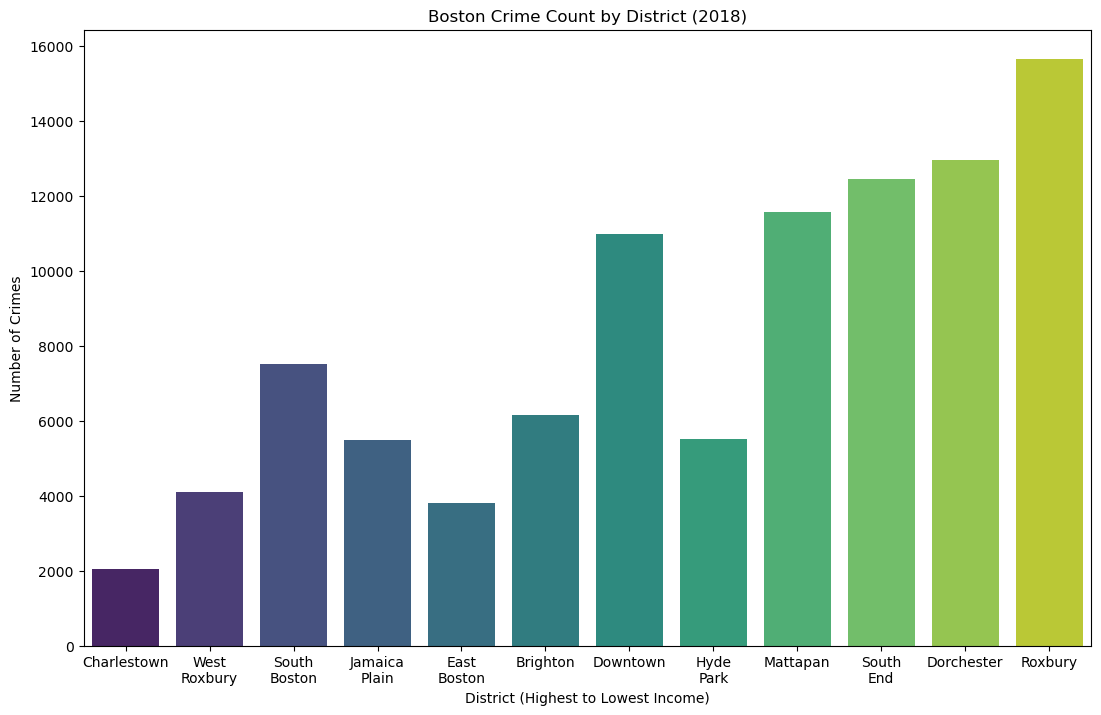

In [9]:
plt.figure(figsize=(13, 8))
sns.barplot(x=df.DISTRICT, y=df.Count_2018, palette='viridis')
plt.title('Boston Crime Count by District (2018)')
plt.xlabel('District (Highest to Lowest Income)')
plt.ylabel('Number of Crimes')
plt.show()

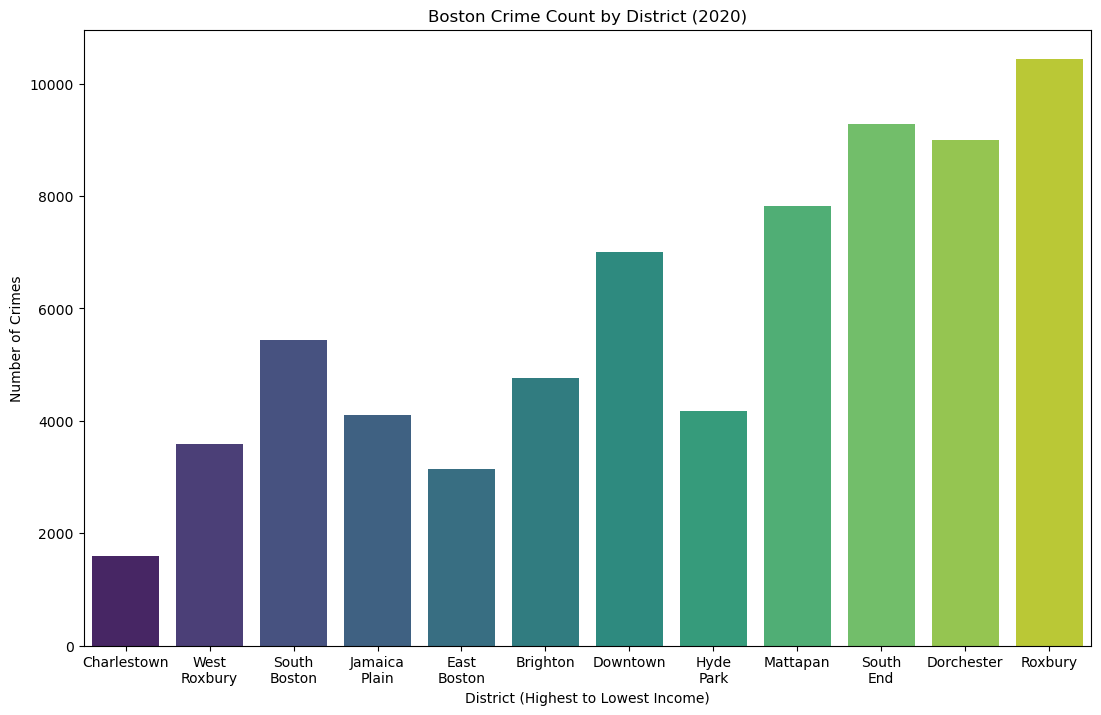

In [10]:
plt.figure(figsize=(13, 8))
sns.barplot(x=df1.DISTRICT, y=df1.Count_2020, palette='viridis')
plt.title('Boston Crime Count by District (2020)')
plt.xlabel('District (Highest to Lowest Income)')
plt.ylabel('Number of Crimes')
plt.show()

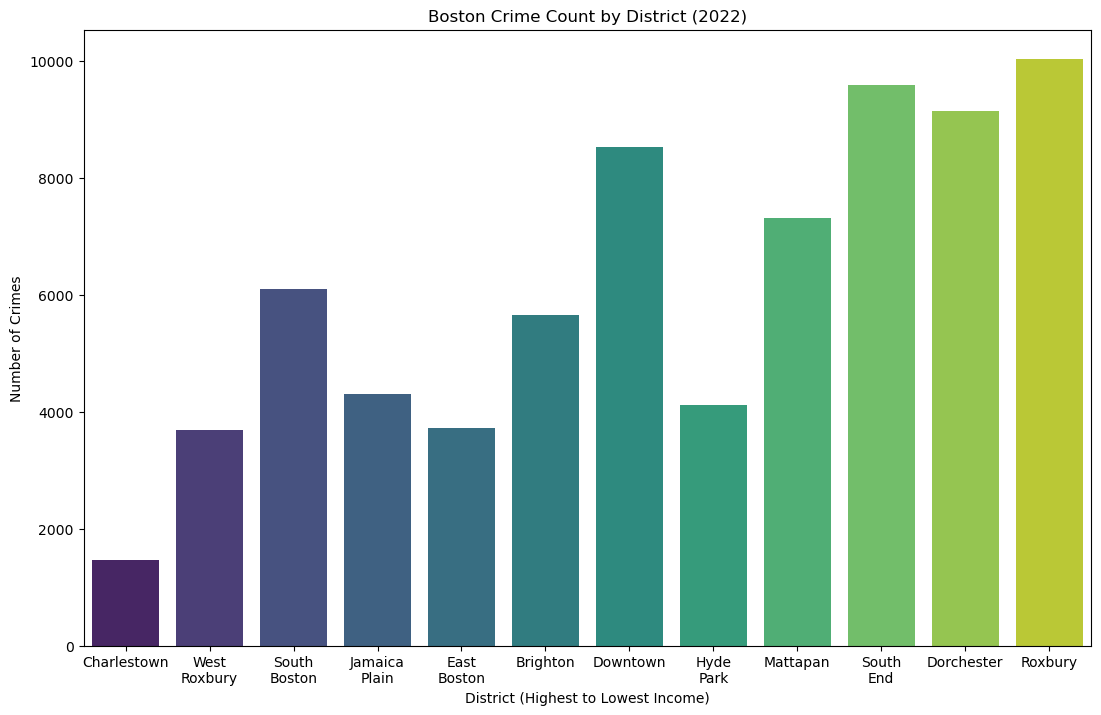

In [11]:
plt.figure(figsize=(13, 8))
sns.barplot(x=df2.DISTRICT, y=df2.Count_2022, palette='viridis')
plt.title('Boston Crime Count by District (2022)')
plt.xlabel('District (Highest to Lowest Income)')
plt.ylabel('Number of Crimes')
plt.show()

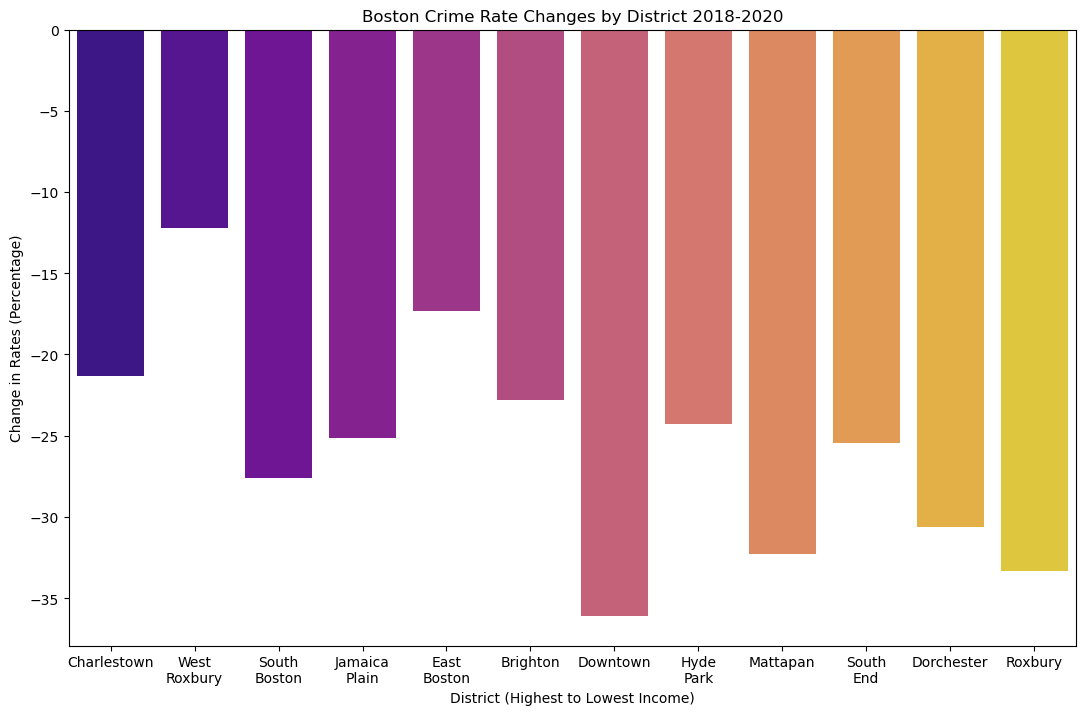

In [12]:
plt.figure(figsize=(13, 8))
sns.barplot(x=compare_18_20.DISTRICT, y=compare_18_20.Percentage_Change, palette='plasma')
plt.title('Boston Crime Rate Changes by District 2018-2020')
plt.xlabel('District (Highest to Lowest Income)')
plt.ylabel('Change in Rates (Percentage)')
plt.show()

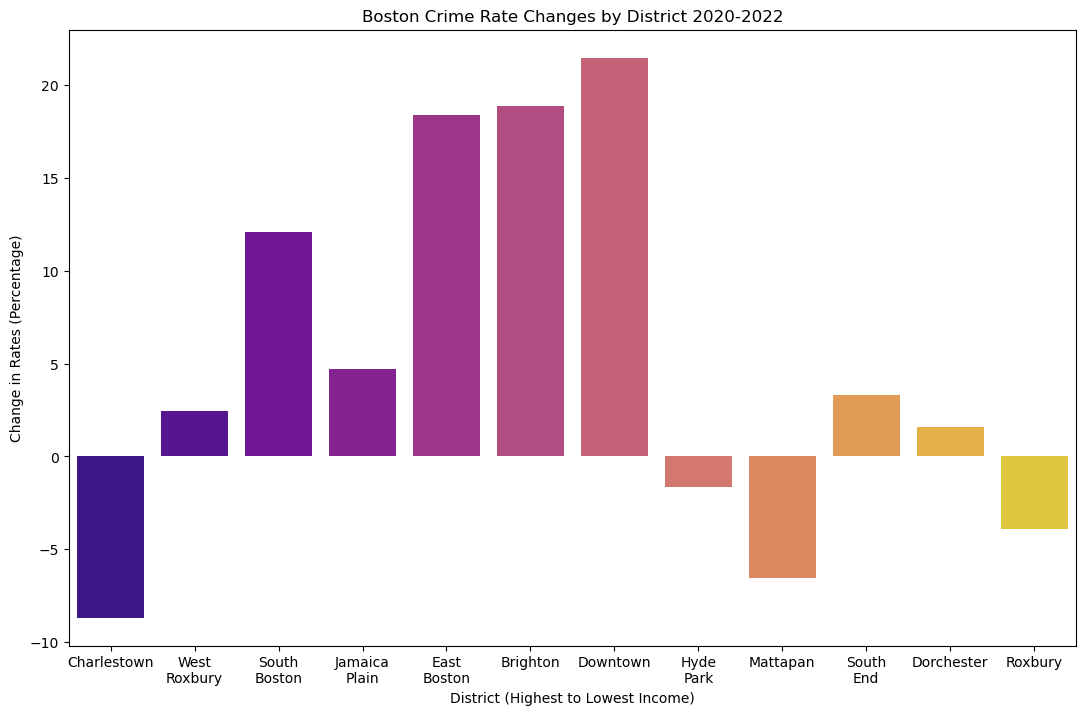

In [13]:
plt.figure(figsize=(13, 8))
sns.barplot(x=compare_20_22.DISTRICT, y=compare_20_22.Percentage_Change, palette='plasma')
plt.title('Boston Crime Rate Changes by District 2020-2022')
plt.xlabel('District (Highest to Lowest Income)')
plt.ylabel('Change in Rates (Percentage)')
plt.show()

# Average Annual Incomes
- Downtown: 66,213
- Charlestown: 91,067
- East Boston: 71,630 
- Roxbury: 45,730
- Mattapan: 63,432
- Dorchester: 47,200
- South Boston: 77,223
- Brighton: 68,656
- South End: 57,699
- Jamaica Plain: 76,968
- Hyde Park: 65,260
- West Roxbury: 79,424

*Source: Boston Planning & Development Agency*